# Stock Features Selections Example Tutorial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
symbols = ['AMD', 'MSFT', 'GE', 'GS', 'AAPL', 'DIS', 'PBR', 'VALE', 'GLD', 'MU']

start = '2017-01-01'
end = '2017-12-31'

In [5]:
def get_symbols(symbols, start=None,end=None):
    out = pd.DataFrame()
    for symbol in symbols:
        df = yf.download(symbol,start, end)[['Open','High','Low','Adj Close','Volume']].reset_index()
        df.columns = ['Date','Open','High','Low','Close','Volume'] #my convention: always lowercase
        df['Symbol'] = symbol # add a new column which contains the symbol so we can keep multiple symbols in the same dataframe
        df = df.set_index(['Date','Symbol'])
        out = pd.concat([out,df],axis=0) #stacks on top of previously collected data
    return out.sort_index()

In [6]:
prices = get_symbols(symbols,start, end)

prices.sort_index().tail()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close    Volume
Date       Symbol                                                          
2017-12-29 GS      255.869995  256.649994  252.910004  252.316071   2519300
           MSFT     85.629997   86.050003   85.500000   84.447639  18717400
           MU       41.820000   41.840000   40.770000   41.119999  44536700
           PBR      10.240000   10.340000   10.220000   10.248709   9124900
           VALE     12.110000   12.300000   12.070000   11.750780  13083500

In [8]:
outcomes = pd.DataFrame(index=prices.index)
# next day's opening change
outcomes['close_1'] = prices.groupby(level='Symbol').Close.pct_change(-1) # next day's returns
outcomes['close_5'] = prices.groupby(level='Symbol').Close.pct_change(-5) # next week's returns
outcomes['close_10'] = prices.groupby(level='Symbol').Close.pct_change(-10) # next two weeks' returns
outcomes['close_20'] = prices.groupby(level='Symbol').Close.pct_change(-20) # next month's (approx) returns
lastancientone@gmail.com
outcomes.tail()

close_1  close_5  close_10  close_20
Date       Symbol                                       
2017-12-29 GS      1.987840      NaN       NaN       NaN
           MSFT    1.053688      NaN       NaN       NaN
           MU      3.012213      NaN       NaN       NaN
           PBR    -0.127827      NaN       NaN       NaN
           VALE         NaN      NaN       NaN       NaN

In [9]:
num_obs = prices.Close.count()
factor_1 = pd.Series(np.random.randn(num_obs),index=prices.index)
factor_2 = pd.Series(np.random.randn(num_obs),index=prices.index)
factor_3 = pd.Series(np.random.randn(num_obs),index=prices.index)
outcome = 1.*factor_1 + 2.*factor_2 + 3.*factor_3 + 5.*np.random.randn(num_obs)
outcome.name = 'outcome'
outcome.tail()

Date        Symbol
2017-12-29  GS        0.780605
            MSFT     -8.948705
            MU        3.096537
            PBR      -1.993213
            VALE     -3.574255
Name: outcome, dtype: float64

In [10]:
features = pd.DataFrame(index=outcome.index)
features['f11'] = 0.2*factor_1 + 0.8*np.random.randn(num_obs)
features['f12'] = 0.4*factor_1 + 0.6*np.random.randn(num_obs)
features['f13'] = 0.6*factor_1 + 0.4*np.random.randn(num_obs)

features['f21'] = 0.2*factor_2 + 0.8*np.random.randn(num_obs)
features['f22'] = 0.4*factor_2 + 0.8*np.random.randn(num_obs)
features['f23'] = 0.6*factor_2 + 0.4*np.random.randn(num_obs)

features['f31'] = 0.2*factor_3 + 0.8*np.random.randn(num_obs)
features['f32'] = 0.4*factor_3 + 0.6*np.random.randn(num_obs)
features['f33'] = 0.6*factor_3 + 0.4*np.random.randn(num_obs)

features['f41'] = 0.2*factor_1+0.2*factor_2 + 0.6*np.random.randn(num_obs)
features['f42'] = 0.2*factor_2+0.2*factor_3 + 0.6*np.random.randn(num_obs)
features['f43'] = 0.2*factor_3+0.2*factor_1 + 0.6*np.random.randn(num_obs)

features['f51'] = np.random.randn(num_obs)
features['f52'] = np.random.randn(num_obs)
features['f53'] = np.random.randn(num_obs)

features.tail()

f11       f12       f13       f21       f22       f23  \
Date       Symbol                                                               
2017-12-29 GS     -0.708417  1.170960 -0.272838  0.340796  0.955704  0.922428   
           MSFT   -0.412080 -0.677584  0.402291 -0.704395 -1.419297 -0.069830   
           MU      1.162023  0.527322  0.413659 -0.689220 -0.802603 -0.642950   
           PBR    -0.063303  0.139136  0.466610  1.672712  0.185156 -0.225218   
           VALE   -0.826687 -0.331924  0.298428  0.409060  0.836741 -0.508785   

                        f31       f32       f33       f41       f42       f43  \
Date       Symbol                                                               
2017-12-29 GS     -0.382945  0.006276  0.469611  0.893710 -0.080377 -0.571865   
           MSFT    0.177365 -0.536390 -0.855180  1.017483 -0.737453 -0.650244   
           MU     -0.238380 -0.056835 -0.365968 -0.575653  0.163185  0.486181   
           PBR     1.278273  0.025657 -0.696229  0.579129  0.784083 -0.420940   
           VALE    0.386179 -0.912035 -0.527460  1.256579  0.187861  0.399490   

                        f51       f52       f53  
Date       Symbol                                
2017-12-29 GS      0.868766  1.300441  1.644469  
           MSFT    1.212068  1.275506 -0.125783  
           MU      0.087168 -2.133441 -1.476354  
           PBR    -1.308168 -1.163237 -0.233313  
           VALE    0.572756  1.302620  0.388087

In [11]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

from scipy.cluster import hierarchy
from scipy.spatial import distance

from sklearn.preprocessing import StandardScaler,Normalizer

In [12]:
#f = features.dropna() #optional - to compare apples to apples

# standardize or normalize data 
std_scaler = StandardScaler()
features_scaled = std_scaler.fit_transform(features.dropna()) 
print (features_scaled.shape)
df = pd.DataFrame(features_scaled,index=features.dropna().index)
df.columns = features.dropna().columns
df.tail()

# standardize outcome as well 
outcome_df = outcome.to_frame()
outcome_scaled = std_scaler.fit_transform(outcome_df.dropna()) 
outcome_scaled = pd.DataFrame(outcome_scaled,index=outcome_df.dropna().index)
outcome_scaled.columns = outcome_df.columns
outcome_scaled.tail()

(2510, 15)


outcome
Date       Symbol          
2017-12-29 GS      0.138691
           MSFT   -1.407162
           MU      0.506661
           PBR    -0.302030
           VALE   -0.553236

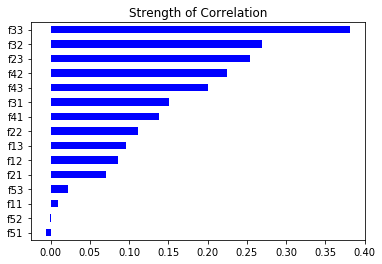

In [13]:
corr = df.corrwith(outcome)
corr.sort_values().plot.barh(color = 'blue',title = 'Strength of Correlation')

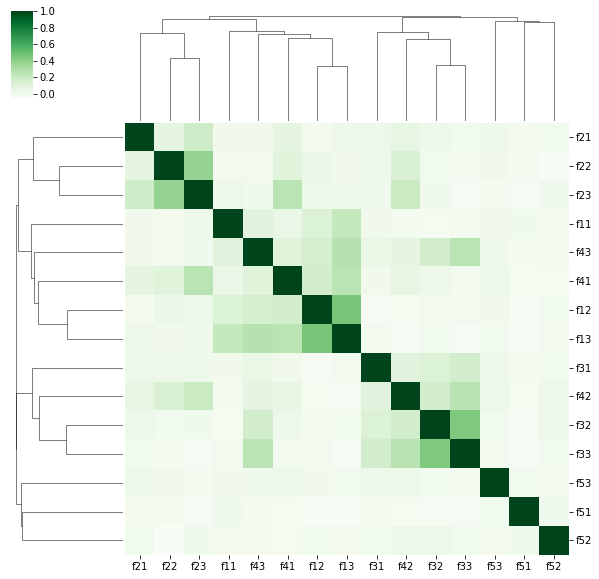

In [14]:
corr_matrix = df.corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,row_cluster=True,\
                   col_cluster=True,figsize=(10,10),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns

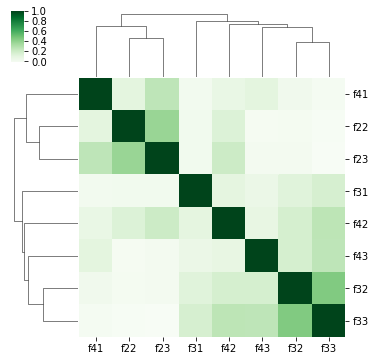

Correlation Strength:
f33    0.381690
f32    0.270013
f23    0.254039
f42    0.224799
f43    0.200102
f31    0.150285
f41    0.138319
f22    0.111660
dtype: float64


In [15]:
correlated_features = corr[corr>0.1].index.tolist()
corr_matrix = df[correlated_features].corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,row_cluster=True,\
                   col_cluster=True,figsize=(6,6),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns
print("Correlation Strength:")
print(corr[corr>0.1].sort_values(ascending=False))

In [16]:
selected_features = ['f33','f23','f42','f41','f31']

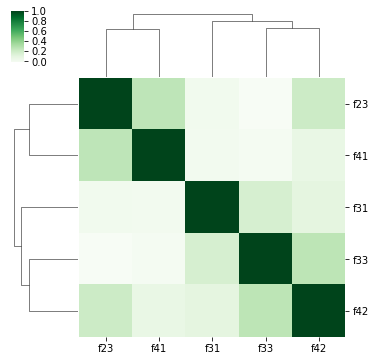

In [17]:
corr_matrix = df[selected_features].corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,row_cluster=True,\
                   col_cluster=True,figsize=(6,6),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns

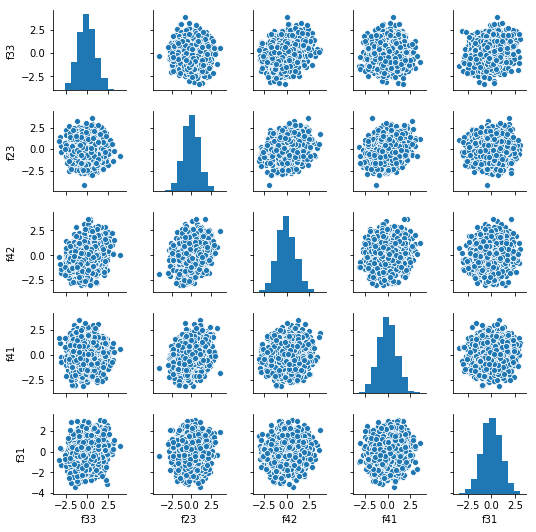

In [19]:
import seaborn as sns
sns.pairplot(df[selected_features],height=1.5)

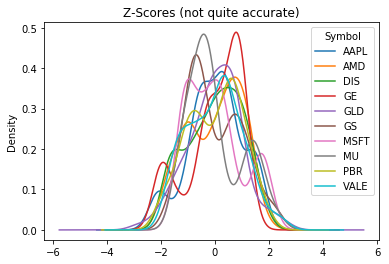

In [22]:
zscore_fxn = lambda x: (x - x.mean()) / x.std()
features['f09'] =prices.groupby(level='Symbol').Close.apply(zscore_fxn)
features.f09.unstack().plot.kde(title='Z-Scores (not quite accurate)')

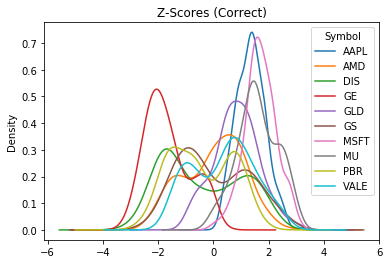

In [24]:
zscore_fun_improved = lambda x: (x - x.rolling(window=200, min_periods=20).mean())/ x.rolling(window=200, min_periods=20).std()
features['f10'] =prices.groupby(level='Symbol').Close.apply(zscore_fun_improved)
features.f10.unstack().plot.kde(title='Z-Scores (Correct)')

In [26]:
rollrank_fxn = lambda x: x.rolling(200,min_periods=20).apply(lambda x: pd.Series(x).rank(pct=True)[0],raw=True)
features['f11'] = prices.groupby(level='Symbol').Volume.apply(rollrank_fxn)

In [29]:
features['f12'] = features['f11'].dropna().groupby(level='Date').rank(pct=True)